In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
import seaborn as sns

import keras
from keras import optimizers
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout
from keras.preprocessing.image import ImageDataGenerator,img_to_array
from sklearn.metrics import confusion_matrix

In [2]:
train_df = pd.read_csv('../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
test_df = pd.read_csv('../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')

In [3]:
train_df.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255
6,8,134,134,135,135,136,137,137,138,138,...,109,102,91,65,138,189,179,181,181,179
7,22,114,42,74,99,104,109,117,127,142,...,214,218,220,223,223,225,227,227,228,228
8,3,169,174,176,180,183,185,187,188,190,...,119,118,123,120,118,114,94,74,61,57
9,3,189,189,189,190,190,191,190,190,190,...,13,53,200,204,201,201,193,175,178,156


In [4]:
train_df.shape

(27455, 785)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [6]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


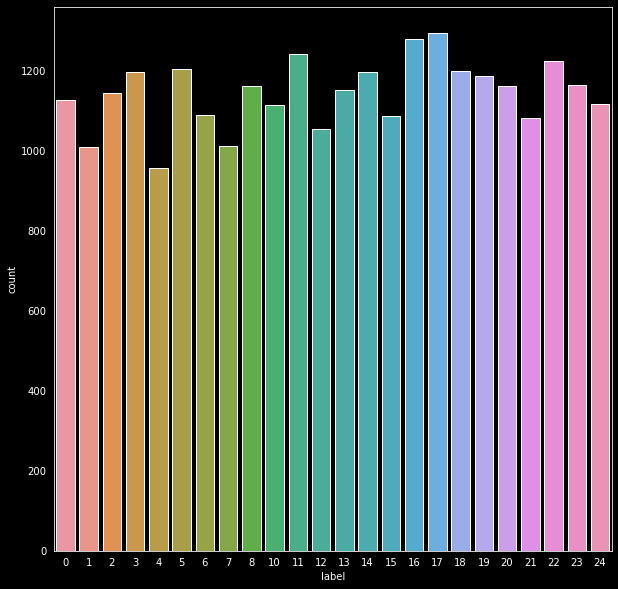

In [10]:
plt.style.use('dark_background')
plt.figure(figsize=(10,10))
sns.countplot(data=train_df,x='label')

In [14]:
y_train = train_df.iloc[:,0]
y_test = test_df.iloc[:,0]

In [15]:
y_train

0         3
1         6
2         2
3         2
4        13
         ..
27450    13
27451    23
27452    18
27453    17
27454    23
Name: label, Length: 27455, dtype: int64

In [16]:
X_train = train_df.iloc[:,1:]
X_test = test_df.iloc[:,1:]

In [17]:
X_train = X_train.values

In [18]:
X_train

array([[107, 118, 127, ..., 204, 203, 202],
       [155, 157, 156, ..., 103, 135, 149],
       [187, 188, 188, ..., 195, 194, 195],
       ...,
       [174, 174, 174, ..., 202, 200, 200],
       [177, 181, 184, ...,  64,  87,  93],
       [179, 180, 180, ..., 205, 209, 215]])

In [19]:
X_test = X_test.values
X_test

array([[149, 149, 150, ..., 112, 120, 107],
       [126, 128, 131, ..., 184, 182, 180],
       [ 85,  88,  92, ..., 225, 224, 222],
       ...,
       [190, 191, 190, ..., 211, 209, 208],
       [201, 205, 208, ...,  67,  70,  63],
       [173, 174, 173, ..., 195, 193, 192]])

In [20]:
X_train = X_train/255
X_test = X_test/255

In [21]:
X_train

array([[0.41960784, 0.4627451 , 0.49803922, ..., 0.8       , 0.79607843,
        0.79215686],
       [0.60784314, 0.61568627, 0.61176471, ..., 0.40392157, 0.52941176,
        0.58431373],
       [0.73333333, 0.7372549 , 0.7372549 , ..., 0.76470588, 0.76078431,
        0.76470588],
       ...,
       [0.68235294, 0.68235294, 0.68235294, ..., 0.79215686, 0.78431373,
        0.78431373],
       [0.69411765, 0.70980392, 0.72156863, ..., 0.25098039, 0.34117647,
        0.36470588],
       [0.70196078, 0.70588235, 0.70588235, ..., 0.80392157, 0.81960784,
        0.84313725]])

In [22]:
X_train = X_train.reshape([-1,28,28,1])

In [23]:
X_train

array([[[[0.41960784],
         [0.4627451 ],
         [0.49803922],
         ...,
         [0.66666667],
         [0.66666667],
         [0.6627451 ]],

        [[0.43529412],
         [0.4745098 ],
         [0.50588235],
         ...,
         [0.67058824],
         [0.67058824],
         [0.66666667]],

        [[0.44313725],
         [0.48235294],
         [0.51372549],
         ...,
         [0.67058824],
         [0.67058824],
         [0.67058824]],

        ...,

        [[0.55686275],
         [0.58823529],
         [0.62352941],
         ...,
         [0.79215686],
         [0.78823529],
         [0.78431373]],

        [[0.55686275],
         [0.59215686],
         [0.62745098],
         ...,
         [0.8       ],
         [0.79607843],
         [0.79215686]],

        [[0.55686275],
         [0.59215686],
         [0.62745098],
         ...,
         [0.8       ],
         [0.79607843],
         [0.79215686]]],


       [[[0.60784314],
         [0.61568627],
         [0.61

In [24]:
X_test = X_test.reshape([-1,28,28,1])
X_test

array([[[[0.58431373],
         [0.58431373],
         [0.58823529],
         ...,
         [0.58823529],
         [0.58823529],
         [0.58431373]],

        [[0.58823529],
         [0.58823529],
         [0.58823529],
         ...,
         [0.59215686],
         [0.58823529],
         [0.59215686]],

        [[0.58823529],
         [0.59215686],
         [0.59215686],
         ...,
         [0.59215686],
         [0.59215686],
         [0.59607843]],

        ...,

        [[0.27058824],
         [0.27058824],
         [0.30196078],
         ...,
         [0.45490196],
         [0.44313725],
         [0.4627451 ]],

        [[0.29019608],
         [0.29411765],
         [0.29803922],
         ...,
         [0.43137255],
         [0.45490196],
         [0.44313725]],

        [[0.29411765],
         [0.29019608],
         [0.29019608],
         ...,
         [0.43921569],
         [0.47058824],
         [0.41960784]]],


       [[[0.49411765],
         [0.50196078],
         [0.51

In [25]:
X_train[1].shape

(28, 28, 1)

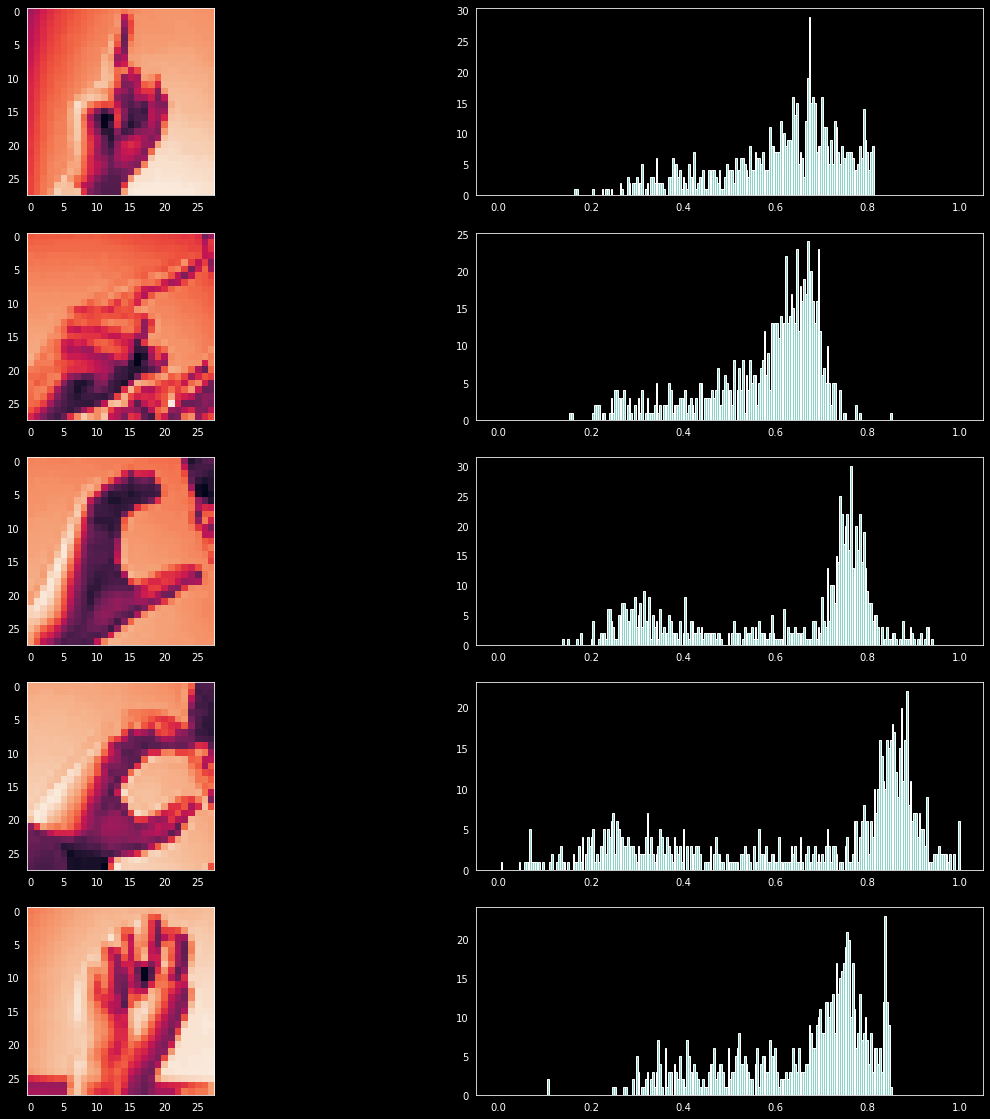

In [35]:
fig,ax = plt.subplots(5,2,figsize=(20,20))

for i in range(5):
    img = X_train[i]
    ax[i,0].imshow(np.squeeze(img))
    ax[i,1].hist(img.ravel(),256,[0,1])
plt.show()

In [40]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
lb = LabelBinarizer()

In [37]:
y_train.shape

(27455,)

In [38]:
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)

In [39]:
y_train.shape

(27455, 24)

In [41]:
Xtrain,Xval,ytrain,yval=train_test_split(X_train, y_train,train_size=0.75,random_state=0)

In [42]:
datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,    
        rotation_range=15,    
        width_shift_range=0.1,
        height_shift_range=0.1,  
        horizontal_flip=True,  
        vertical_flip=False)

In [44]:
datagen.fit(Xtrain)

In [45]:
model = Sequential()

In [47]:
 model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(24, activation='softmax'))

In [50]:
learning_rate = 1e-3
lr_decay = 1e-6
sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

In [52]:
history = model.fit_generator(datagen.flow(Xtrain, ytrain, batch_size=32),
                    steps_per_epoch=Xtrain.shape[0]//32,
                    epochs=10,
                    verbose=1,
                    validation_data=(Xval, yval))

Epoch 1/10
643/643 [==============================] - 187s 291ms/step - loss: 3.1771 - accuracy: 0.0458 - val_loss: 3.1763 - val_accuracy: 0.0439
Epoch 2/10
643/643 [==============================] - 186s 289ms/step - loss: 3.1754 - accuracy: 0.0485 - val_loss: 3.1737 - val_accuracy: 0.0605
Epoch 3/10
643/643 [==============================] - 186s 289ms/step - loss: 3.1721 - accuracy: 0.0525 - val_loss: 3.1629 - val_accuracy: 0.0727
Epoch 4/10
643/643 [==============================] - 186s 289ms/step - loss: 3.1585 - accuracy: 0.0641 - val_loss: 3.1128 - val_accuracy: 0.1132
Epoch 5/10
643/643 [==============================] - 186s 289ms/step - loss: 3.1058 - accuracy: 0.0816 - val_loss: 2.9311 - val_accuracy: 0.1623
Epoch 6/10
643/643 [==============================] - 186s 289ms/step - loss: 2.9933 - accuracy: 0.1110 - val_loss: 2.6359 - val_accuracy: 0.2407
Epoch 7/10
643/643 [==============================] - 186s 289ms/step - loss: 2.8317 - accuracy: 0.1412 - val_loss: 2.3719 -

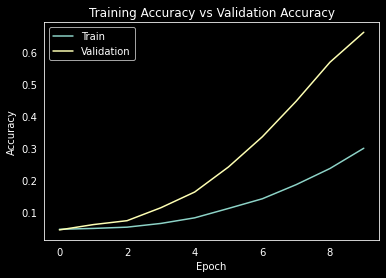

In [53]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

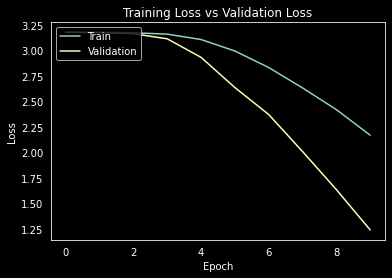

In [54]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [55]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Loss: " + str(score[0]))
print("Accuracy: " + str(score[1]*100) + "%")

NameError: name 'test_x' is not defined